In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import decode_predictions
from efficientnet import EfficientNetB0, EfficientNetB3
from efficientnet import center_crop_and_resize, preprocess_input

import os

Using TensorFlow backend.


# Download EfficientNet

In [2]:
model = EfficientNetB0(weights='imagenet')

Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
21856256/21849008 [==============================] - 6s 0us/step


# Load Image

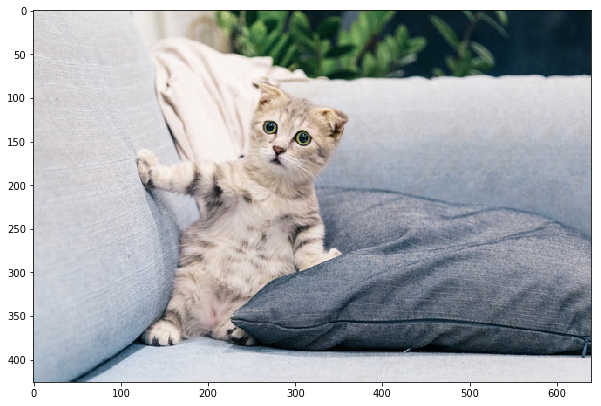

In [3]:
image = imread('imgs/cat.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# Center Crop and Resize

/Users/brad/bdf/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/brad/bdf/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


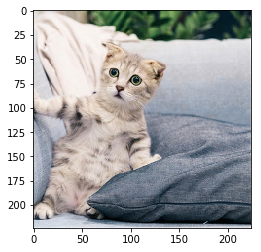

In [4]:
image_size = model.input_shape[1] # 224

x = center_crop_and_resize(image, image_size=image_size)

plt.imshow(x.astype(np.uint8))

# Preprocess Input

In [5]:
x = preprocess_input(x)
x = np.expand_dims(x, 0)

y = model.predict(x)

dy = decode_predictions(y)

print(dy)

40960/35363 [==================================] - 0s 5us/step
[[('n02124075', 'Egyptian_cat', 0.56673306), ('n02123045', 'tabby', 0.07127371), ('n02127052', 'lynx', 0.06892886), ('n02123159', 'tiger_cat', 0.025088655), ('n02123394', 'Persian_cat', 0.011794706)]]


# Define Inference Function

In [6]:
def inference(model, image_path):
    image = imread(image_path)
    
    image_size = model.input_shape[1] # 224
    cx = center_crop_and_resize(image, image_size=image_size)
    
    x = preprocess_input(cx)
    x = np.expand_dims(x, 0)

    y = model.predict(x)
    dy = decode_predictions(y)[0]
    
    for idx, label, confidence in dy:
        print('%s: %.2f%%' % (label, confidence * 100))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cx.astype(np.uint8))
    plt.show()

# Test

palace: 34.89%
castle: 18.74%
organ: 12.71%
bell_cote: 11.20%
tile_roof: 1.66%


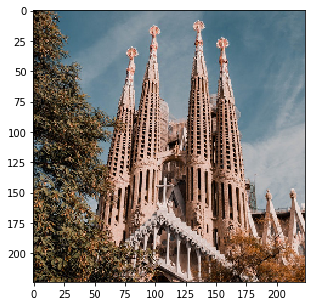

In [7]:
inference(model, 'imgs/01.jpg')

gazelle: 33.64%
hare: 9.19%
ibex: 7.06%
ox: 5.19%
wallaby: 5.06%


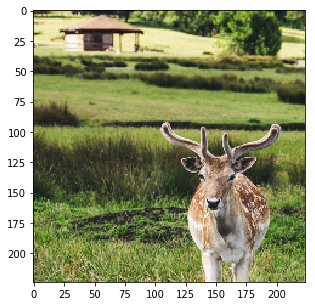

In [8]:
inference(model, 'imgs/02.jpg')

carbonara: 65.66%
plate: 4.21%
broccoli: 1.56%
wok: 1.19%
hot_pot: 1.08%


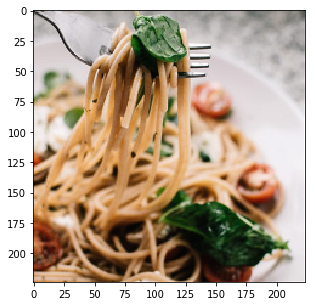

In [9]:
inference(model, 'imgs/03.jpg')

beacon: 76.10%
breakwater: 1.83%
mosque: 0.80%
water_tower: 0.59%
bell_cote: 0.50%


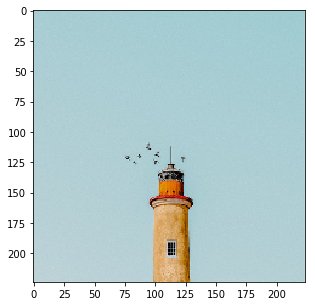

In [10]:
inference(model, 'imgs/04.jpg')

maze: 39.64%
breakwater: 14.61%
lakeside: 5.87%
patio: 3.34%
sandbar: 2.42%


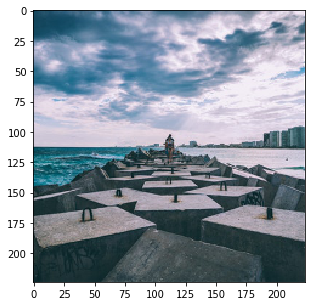

In [11]:
inference(model, 'imgs/05.jpg')

# EfficientNetB3

In [12]:
model3 = EfficientNetB3(weights='imagenet')

50126848/50122568 [==============================] - 10s 0us/step


palace: 78.02%
castle: 4.11%
bell_cote: 4.03%
church: 1.10%
dome: 0.67%


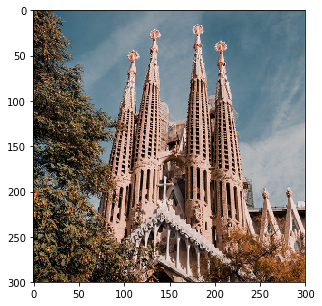

In [13]:
inference(model3, 'imgs/01.jpg')

gazelle: 65.30%
impala: 5.39%
water_buffalo: 3.30%
wallaby: 1.88%
hartebeest: 1.24%


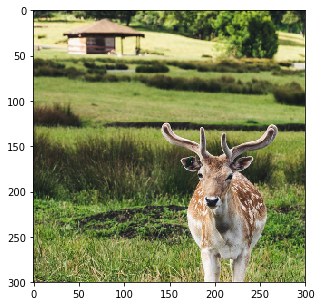

In [14]:
inference(model3, 'imgs/02.jpg')

carbonara: 82.24%
plate: 10.06%
restaurant: 0.32%
hot_pot: 0.18%
broccoli: 0.12%


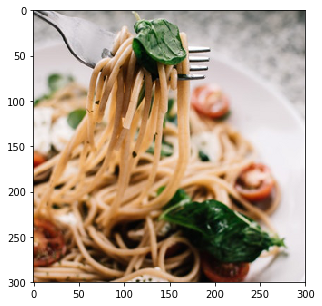

In [15]:
inference(model3, 'imgs/03.jpg')

beacon: 84.78%
breakwater: 1.12%
water_tower: 0.18%
bell_cote: 0.13%
lifeboat: 0.12%


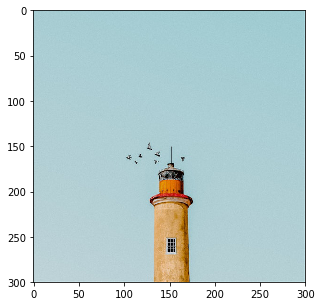

In [16]:
inference(model3, 'imgs/04.jpg')

breakwater: 76.14%
maze: 1.86%
lakeside: 0.83%
dock: 0.53%
fountain: 0.51%


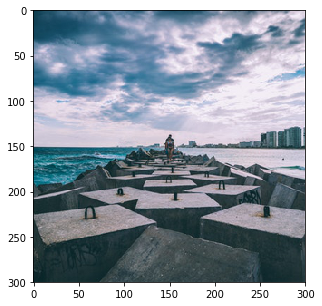

In [17]:
inference(model3, 'imgs/05.jpg')